<a href="https://colab.research.google.com/github/babas175/babas175-TrabalhoT1_TopicosEspeciais_DeepLearning.ipynb/blob/main/TCCII.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Diretório de dados: /content/drive/MyDrive/terremotos_imagens
Imagens shape: (1655, 128, 128)
Treino: (1324, 128, 128, 1), (1324,)
Validação: (331, 128, 128, 1), (331,)
Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_44 (Conv2D)          (None, 126, 126, 32)      320       
                                                                 
 batch_normalization_12 (Ba  (None, 126, 126, 32)      128       
 tchNormalization)                                               
                                                                 
 max_pooling2d_44 (MaxPooli  (None, 63, 63, 32)        0         
 ng2D)                                                           
                                                                 
 dropout_46 (Dropou

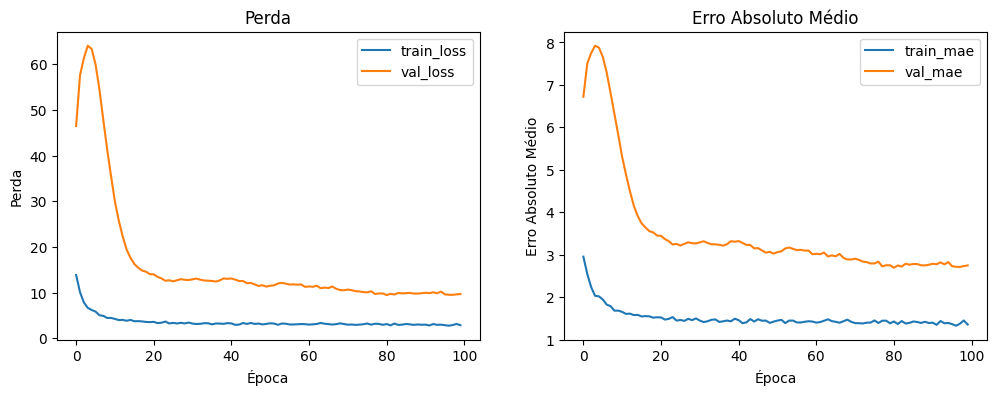

11/11 [==============================] - 4s 327ms/step
Imagem 1 - Real: 6.4, Predito: 3.4000000953674316
Imagem 2 - Real: 4.4, Predito: 3.9000000953674316
Imagem 3 - Real: 6.6, Predito: 3.200000047683716
Imagem 4 - Real: 5.0, Predito: 3.0
Imagem 5 - Real: 5.3, Predito: 2.700000047683716
Imagem 6 - Real: 6.0, Predito: 1.7000000476837158
Imagem 7 - Real: 7.3, Predito: 3.0999999046325684
Imagem 8 - Real: 4.0, Predito: 3.0
Imagem 9 - Real: 4.5, Predito: 3.0999999046325684
Imagem 10 - Real: 5.4, Predito: 2.700000047683716
Imagem 11 - Real: 7.8, Predito: 3.700000047683716
Imagem 12 - Real: 6.0, Predito: 5.800000190734863
Imagem 13 - Real: 6.2, Predito: 1.2000000476837158
Imagem 14 - Real: 5.4, Predito: 3.5
Imagem 15 - Real: 7.9, Predito: 2.299999952316284
Imagem 16 - Real: 6.9, Predito: 3.299999952316284
Imagem 17 - Real: 4.1, Predito: 2.0
Imagem 18 - Real: 6.4, Predito: 3.200000047683716
Imagem 19 - Real: 7.5, Predito: 0.800000011920929
Imagem 20 - Real: 5.6, Predito: 1.2000000476837158
Ima

In [ ]:
import numpy as np
import os
import cv2
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Montando o Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Definindo o caminho para o dataset
data_dir_path = os.path.join('/content/drive/MyDrive', 'terremotos_imagens')

# Verificando se o caminho existe
if not os.path.exists(data_dir_path):
    raise OSError(f"Diretório de dados não encontrado: {data_dir_path}")

print(f"Diretório de dados: {data_dir_path}")

# Função para carregar e pré-processar as imagens
def load_and_preprocess_image(path):
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (128, 128))  # Redimensionando para 128x128 pixels
    img = img / 255.0  # Normalizando para [0, 1]
    return img

# Inicializando listas para imagens
images = []

# Iterando sobre os arquivos no diretório de imagens
count = 0
for file in os.listdir(data_dir_path):
    if file.endswith('.jpg') or file.endswith('.png'):
        img_path = os.path.join(data_dir_path, file)
        img = load_and_preprocess_image(img_path)
        images.append(img)

        count += 1
        if count >= 2500:  # Limite de 1000 imagens para teste
            break

# Convertendo listas para numpy arrays
images = np.array(images)

# Verificando as dimensões
print(f'Imagens shape: {images.shape}')

# Expandindo a dimensão das imagens para incluir o canal
images = np.expand_dims(images, axis=-1)

# Gerar magnitudes fictícias para treinamento inicial
magnitudes = np.random.uniform(4.0, 8.0, size=(images.shape[0],))

# Dividindo os dados (80% para treino e 20% para validação)
X_train, X_val, y_train, y_val = train_test_split(images, magnitudes, test_size=0.2, random_state=42)

print(f'Treino: {X_train.shape}, {y_train.shape}')
print(f'Validação: {X_val.shape}, {y_val.shape}')

# Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True
)

# Construção da Rede Neural com uma arquitetura mais profunda
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 1)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.3),
    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.3),
    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.3),
    Conv2D(256, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.3),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1)
])

model.compile(optimizer=Adam(learning_rate=0.00001), loss='mean_squared_error', metrics=['mean_absolute_error'])

model.summary()

# Treinamento da Rede com Data Augmentation
history = model.fit(
    datagen.flow(X_train, y_train, batch_size=32),
    validation_data=(X_val, y_val),
    epochs=100,  # Aumentei o número de épocas
)

# Avaliar o modelo
loss, mae = model.evaluate(X_val, y_val)
print(f"Loss: {loss}, MAE: {mae}")

# Plotar as curvas de perda e erro absoluto médio
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Perda')
plt.xlabel('Época')
plt.ylabel('Perda')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['mean_absolute_error'], label='train_mae')
plt.plot(history.history['val_mean_absolute_error'], label='val_mae')
plt.title('Erro Absoluto Médio')
plt.xlabel('Época')
plt.ylabel('Erro Absoluto Médio')
plt.legend()

plt.show()

# Predizendo no conjunto de validação
y_pred = model.predict(X_val)

# Comparar as previsões com os valores reais
for i in range(len(y_val)):
    real_value = round(y_val[i], 1)
    predicted_value = round(y_pred[i][0], 1)
    print(f"Imagem {i+1} - Real: {real_value}, Predito: {predicted_value}")


Mounted at /content/drive
Diretório de dados: /content/drive/MyDrive/terremotos_imagens
Imagens shape: (1655, 128, 128)
Treino: (1324, 128, 128, 1), (1324,)
Validação: (331, 128, 128, 1), (331,)
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      320       
                                                                 
 batch_normalization (Batch  (None, 126, 126, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 63, 63, 32)        0         
                                                           

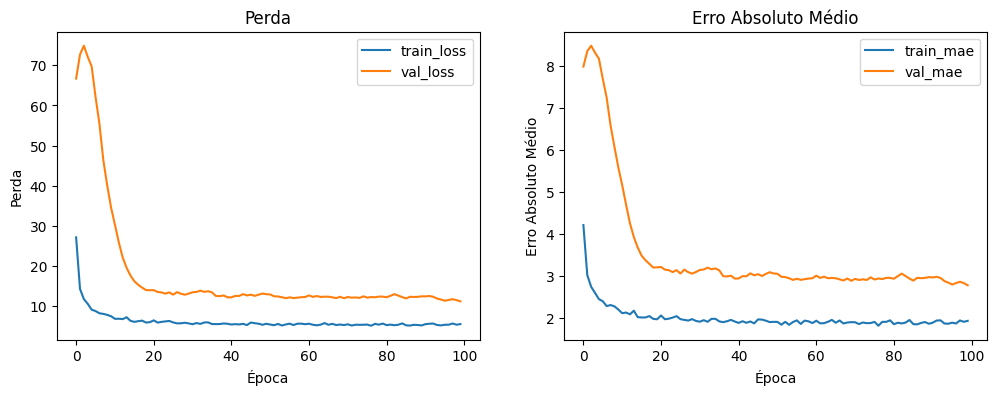

11/11 [==============================] - 6s 470ms/step
Imagem 1 - Real: 6.9, Predito: 4.599999904632568
Imagem 2 - Real: 7.5, Predito: 5.0
Imagem 3 - Real: 6.2, Predito: 3.5999999046325684
Imagem 4 - Real: 9.1, Predito: 4.800000190734863
Imagem 5 - Real: 7.1, Predito: 4.199999809265137
Imagem 6 - Real: 7.7, Predito: 2.0999999046325684
Imagem 7 - Real: 8.6, Predito: 4.599999904632568
Imagem 8 - Real: 4.6, Predito: 4.300000190734863
Imagem 9 - Real: 5.0, Predito: 4.400000095367432
Imagem 10 - Real: 7.9, Predito: 3.5999999046325684
Imagem 11 - Real: 4.4, Predito: 3.799999952316284
Imagem 12 - Real: 9.0, Predito: 5.5
Imagem 13 - Real: 4.5, Predito: 2.299999952316284
Imagem 14 - Real: 5.1, Predito: 4.199999809265137
Imagem 15 - Real: 5.2, Predito: 3.0
Imagem 16 - Real: 5.1, Predito: 5.300000190734863
Imagem 17 - Real: 6.2, Predito: 2.0999999046325684
Imagem 18 - Real: 9.7, Predito: 4.699999809265137
Imagem 19 - Real: 8.1, Predito: 1.7000000476837158
Imagem 20 - Real: 8.8, Predito: 1.6000000

In [ ]:
import numpy as np
import os
import cv2
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Montando o Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Definindo o caminho para o dataset
data_dir_path = os.path.join('/content/drive/MyDrive', 'terremotos_imagens')

# Verificando se o caminho existe
if not os.path.exists(data_dir_path):
    raise OSError(f"Diretório de dados não encontrado: {data_dir_path}")

print(f"Diretório de dados: {data_dir_path}")

# Função para carregar e pré-processar as imagens
def load_and_preprocess_image(path):
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (128, 128))  # Redimensionando para 128x128 pixels
    img = img / 255.0  # Normalizando para [0, 1]
    return img

# Inicializando listas para imagens
images = []

# Iterando sobre os arquivos no diretório de imagens
count = 0
for file in os.listdir(data_dir_path):
    if file.endswith('.jpg') or file.endswith('.png'):
        img_path = os.path.join(data_dir_path, file)
        img = load_and_preprocess_image(img_path)
        images.append(img)

        count += 1
        if count >= 2500:  # Limite de 1000 imagens para teste
            break

# Convertendo listas para numpy arrays
images = np.array(images)

# Verificando as dimensões
print(f'Imagens shape: {images.shape}')

# Expandindo a dimensão das imagens para incluir o canal
images = np.expand_dims(images, axis=-1)

# Gerar magnitudes fictícias para treinamento inicial
magnitudes = np.random.uniform(4.0, 10.0, size=(images.shape[0],))

# Dividindo os dados (80% para treino e 20% para validação)
X_train, X_val, y_train, y_val = train_test_split(images, magnitudes, test_size=0.2, random_state=42)

print(f'Treino: {X_train.shape}, {y_train.shape}')
print(f'Validação: {X_val.shape}, {y_val.shape}')

# Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True
)

# Construção da Rede Neural com uma arquitetura mais profunda
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 1)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.3),
    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.3),
    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.3),
    Conv2D(256, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.3),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1)
])

model.compile(optimizer=Adam(learning_rate=0.00001), loss='mean_squared_error', metrics=['mean_absolute_error'])

model.summary()

# Treinamento da Rede com Data Augmentation
history = model.fit(
    datagen.flow(X_train, y_train, batch_size=32),
    validation_data=(X_val, y_val),
    epochs=100,  # Aumentei o número de épocas
)

# Avaliar o modelo
loss, mae = model.evaluate(X_val, y_val)
print(f"Loss: {loss}, MAE: {mae}")

# Plotar as curvas de perda e erro absoluto médio
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Perda')
plt.xlabel('Época')
plt.ylabel('Perda')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['mean_absolute_error'], label='train_mae')
plt.plot(history.history['val_mean_absolute_error'], label='val_mae')
plt.title('Erro Absoluto Médio')
plt.xlabel('Época')
plt.ylabel('Erro Absoluto Médio')
plt.legend()

plt.show()


y_pred = model.predict(X_val)

for i in range(len(y_val)):
    real_value = round(y_val[i], 1)
    predicted_value = round(y_pred[i][0], 1)
    print(f"Imagem {i+1} - Real: {real_value}, Predito: {predicted_value}")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Diretório de dados: /content/drive/MyDrive/terremotos_imagens
Imagens shape: (1655, 128, 128)
Treino: (1324, 128, 128, 1), (1324,)
Validação: (331, 128, 128, 1), (331,)
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 126, 126, 32)      320       
                                                                 
 batch_normalization_4 (Bat  (None, 126, 126, 32)      128       
 chNormalization)                                                
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 63, 63, 32)        0         
 g2D)                                                            
                                                                 
 dropout_5 (Dropout)

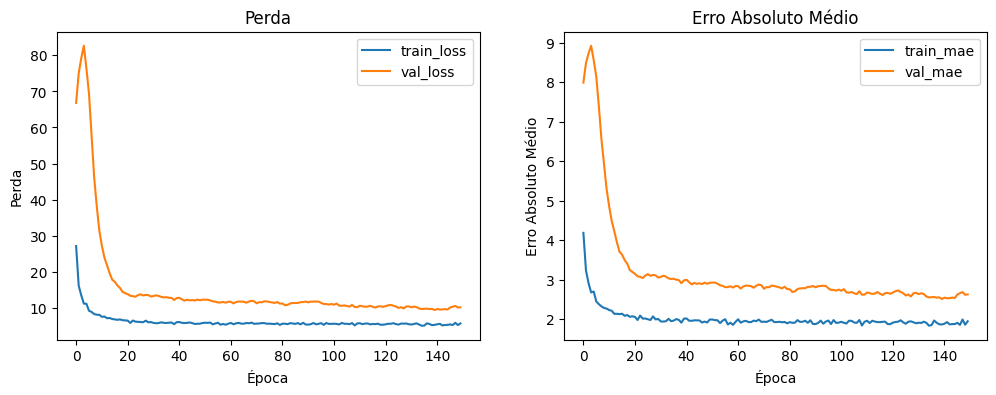

11/11 [==============================] - 4s 323ms/step
Imagem 1 - Real: 5.9, Predito: 4.699999809265137
Imagem 2 - Real: 6.9, Predito: 4.900000095367432
Imagem 3 - Real: 6.5, Predito: 4.800000190734863
Imagem 4 - Real: 7.8, Predito: 4.400000095367432
Imagem 5 - Real: 9.0, Predito: 4.199999809265137
Imagem 6 - Real: 7.5, Predito: 2.9000000953674316
Imagem 7 - Real: 8.5, Predito: 4.800000190734863
Imagem 8 - Real: 9.9, Predito: 5.300000190734863
Imagem 9 - Real: 7.1, Predito: 4.0
Imagem 10 - Real: 6.0, Predito: 3.5999999046325684
Imagem 11 - Real: 9.8, Predito: 5.199999809265137
Imagem 12 - Real: 7.4, Predito: 6.599999904632568
Imagem 13 - Real: 4.7, Predito: 1.899999976158142
Imagem 14 - Real: 8.7, Predito: 6.099999904632568
Imagem 15 - Real: 8.5, Predito: 2.9000000953674316
Imagem 16 - Real: 6.9, Predito: 5.900000095367432
Imagem 17 - Real: 9.3, Predito: 2.0999999046325684
Imagem 18 - Real: 7.9, Predito: 5.5
Imagem 19 - Real: 5.2, Predito: 1.0
Imagem 20 - Real: 5.7, Predito: 1.89999997

In [ ]:
import numpy as np
import os
import cv2
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Montando o Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Definindo o caminho para o dataset
data_dir_path = os.path.join('/content/drive/MyDrive', 'terremotos_imagens')

# Verificando se o caminho existe
if not os.path.exists(data_dir_path):
    raise OSError(f"Diretório de dados não encontrado: {data_dir_path}")

print(f"Diretório de dados: {data_dir_path}")

# Função para carregar e pré-processar as imagens
def load_and_preprocess_image(path):
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (128, 128))  # Redimensionando para 128x128 pixels
    img = img / 255.0  # Normalizando para [0, 1]
    return img

# Inicializando listas para imagens
images = []

# Iterando sobre os arquivos no diretório de imagens
count = 0
for file in os.listdir(data_dir_path):
    if file.endswith('.jpg') or file.endswith('.png'):
        img_path = os.path.join(data_dir_path, file)
        img = load_and_preprocess_image(img_path)
        images.append(img)

        count += 1
        if count >= 2500:  # Limite de 1000 imagens para teste
            break

# Convertendo listas para numpy arrays
images = np.array(images)

# Verificando as dimensões
print(f'Imagens shape: {images.shape}')

# Expandindo a dimensão das imagens para incluir o canal
images = np.expand_dims(images, axis=-1)

# Gerar magnitudes fictícias para treinamento inicial
magnitudes = np.random.uniform(4.0, 10.0, size=(images.shape[0],))

# Dividindo os dados (80% para treino e 20% para validação)
X_train, X_val, y_train, y_val = train_test_split(images, magnitudes, test_size=0.2, random_state=42)

print(f'Treino: {X_train.shape}, {y_train.shape}')
print(f'Validação: {X_val.shape}, {y_val.shape}')

# Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True
)

# Construção da Rede Neural com uma arquitetura mais profunda
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 1)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.3),
    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.3),
    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.3),
    Conv2D(256, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.3),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1)
])

model.compile(optimizer=Adam(learning_rate=0.00001), loss='mean_squared_error', metrics=['mean_absolute_error'])

model.summary()

# Treinamento da Rede com Data Augmentation
history = model.fit(
    datagen.flow(X_train, y_train, batch_size=32),
    validation_data=(X_val, y_val),
    epochs=150,  # Aumentei o número de épocas
)

# Avaliar o modelo
loss, mae = model.evaluate(X_val, y_val)
print(f"Loss: {loss}, MAE: {mae}")

# Plotar as curvas de perda e erro absoluto médio
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Perda')
plt.xlabel('Época')
plt.ylabel('Perda')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['mean_absolute_error'], label='train_mae')
plt.plot(history.history['val_mean_absolute_error'], label='val_mae')
plt.title('Erro Absoluto Médio')
plt.xlabel('Época')
plt.ylabel('Erro Absoluto Médio')
plt.legend()

plt.show()


y_pred = model.predict(X_val)

for i in range(len(y_val)):
    real_value = round(y_val[i], 1)
    predicted_value = round(y_pred[i][0], 1)
    print(f"Imagem {i+1} - Real: {real_value}, Predito: {predicted_value}")

A saída de streaming foi truncada nas últimas 5000 linhas.
Processing image: /content/drive/MyDrive/terremotos/terremoto_12130.jpg
Processing image: /content/drive/MyDrive/terremotos/terremoto_12132.jpg
Processing image: /content/drive/MyDrive/terremotos/terremoto_12133.jpg
Processing image: /content/drive/MyDrive/terremotos/terremoto_12134.jpg
Processing image: /content/drive/MyDrive/terremotos/terremoto_12135.jpg
Processing image: /content/drive/MyDrive/terremotos/terremoto_12136.jpg
Processing image: /content/drive/MyDrive/terremotos/terremoto_12137.jpg
Processing image: /content/drive/MyDrive/terremotos/terremoto_12138.jpg
Processing image: /content/drive/MyDrive/terremotos/terremoto_12140.jpg
Processing image: /content/drive/MyDrive/terremotos/terremoto_12141.jpg
Processing image: /content/drive/MyDrive/terremotos/terremoto_12142.jpg
Processing image: /content/drive/MyDrive/terremotos/terremoto_12143.jpg
Processing image: /content/drive/MyDrive/terremotos/terremoto_12144.jpg
Proce

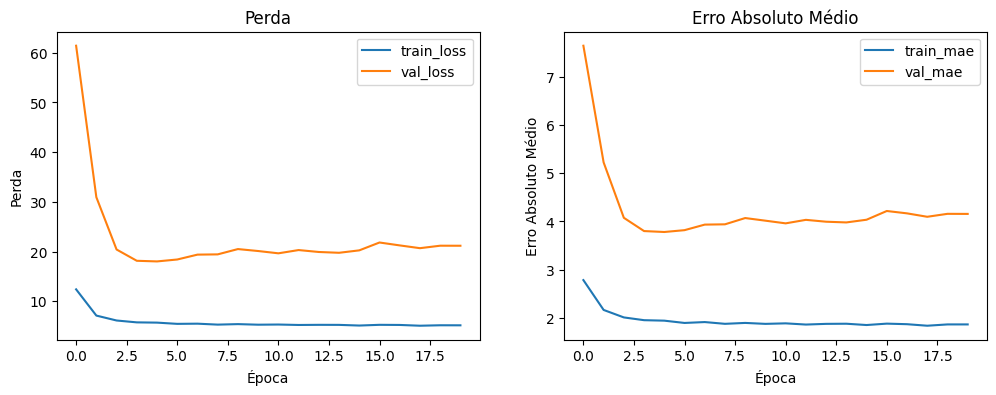

63/63 [==============================] - 24s 373ms/step
Imagem 1 - Real: 6.4, Predito: 1.899999976158142
Imagem 2 - Real: 9.8, Predito: 3.0999999046325684
Imagem 3 - Real: 8.4, Predito: 4.699999809265137
Imagem 4 - Real: 9.8, Predito: 3.5
Imagem 5 - Real: 6.1, Predito: 3.5999999046325684
Imagem 6 - Real: 5.3, Predito: 2.4000000953674316
Imagem 7 - Real: 5.9, Predito: 2.0
Imagem 8 - Real: 6.3, Predito: 2.4000000953674316
Imagem 9 - Real: 7.8, Predito: 2.5999999046325684
Imagem 10 - Real: 5.0, Predito: 3.5
Imagem 11 - Real: 8.7, Predito: 4.5
Imagem 12 - Real: 5.8, Predito: 4.300000190734863
Imagem 13 - Real: 4.1, Predito: 5.599999904632568
Imagem 14 - Real: 6.5, Predito: 1.0
Imagem 15 - Real: 5.3, Predito: 4.300000190734863
Imagem 16 - Real: 9.6, Predito: 2.5
Imagem 17 - Real: 5.7, Predito: 1.399999976158142
Imagem 18 - Real: 8.4, Predito: 3.0
Imagem 19 - Real: 7.4, Predito: 2.799999952316284
Imagem 20 - Real: 5.9, Predito: 2.4000000953674316
Imagem 21 - Real: 4.7, Predito: 2.09999990463

In [ ]:
import numpy as np
import os
import cv2
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Montando o Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Definindo o caminho para o dataset
data_dir_path = os.path.join('/content/drive/MyDrive', 'terremotos')

# Verificando se o caminho existe
if not os.path.exists(data_dir_path):
    raise OSError(f"Diretório de dados não encontrado: {data_dir_path}")

print(f"Diretório de dados: {data_dir_path}")

# Função para carregar e pré-processar as imagens
def load_and_preprocess_image(path):
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        print(f"Failed to load image at path: {path}")
        return None
    img = cv2.resize(img, (128, 128))  # Redimensionando para 128x128 pixels
    img = img / 255.0  # Normalizando para [0, 1]
    return img

images = []

count = 0
for file in os.listdir(data_dir_path):
    if file.endswith('.jpg') or file.endswith('.png'):
        img_path = os.path.join(data_dir_path, file)
        print(f"Processing image: {img_path}")
        img = load_and_preprocess_image(img_path)
        if img is not None:
            images.append(img)

        count += 1
        if count >= 10000:  # Limite de 1000 imagens para teste
            break

# Convertendo listas para numpy arrays
images = np.array(images)

# Verificando as dimensões
print(f'Imagens shape: {images.shape}')

# Expandindo a dimensão das imagens para incluir o canal
images = np.expand_dims(images, axis=-1)

# Gerar magnitudes fictícias para treinamento inicial
magnitudes = np.random.uniform(4.0, 10.0, size=(images.shape[0],))

# Dividindo os dados (80% para treino e 20% para validação)
X_train, X_val, y_train, y_val = train_test_split(images, magnitudes, test_size=0.2, random_state=42)

print(f'Treino: {X_train.shape}, {y_train.shape}')
print(f'Validação: {X_val.shape}, {y_val.shape}')

# Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True
)

# Construção da Rede Neural com uma arquitetura mais profunda
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 1)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.3),
    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.3),
    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.3),
    Conv2D(256, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.3),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1)
])

model.compile(optimizer=Adam(learning_rate=0.00001), loss='mean_squared_error', metrics=['mean_absolute_error'])

model.summary()

# Treinamento da Rede com Data Augmentation
history = model.fit(
    datagen.flow(X_train, y_train, batch_size=32),
    validation_data=(X_val, y_val),
    epochs=20,  # Aumentei o número de épocas
)

# Avaliar o modelo
loss, mae = model.evaluate(X_val, y_val)
print(f"Loss: {loss}, MAE: {mae}")

# Plotar as curvas de perda e erro absoluto médio
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Perda')
plt.xlabel('Época')
plt.ylabel('Perda')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['mean_absolute_error'], label='train_mae')
plt.plot(history.history['val_mean_absolute_error'], label='val_mae')
plt.title('Erro Absoluto Médio')
plt.xlabel('Época')
plt.ylabel('Erro Absoluto Médio')
plt.legend()

plt.show()


y_pred = model.predict(X_val)

for i in range(len(y_val)):
    real_value = round(y_val[i], 1)
    predicted_value = round(y_pred[i][0], 1)
    print(f"Imagem {i+1} - Real: {real_value}, Predito: {predicted_value}")

In [ ]:
import numpy as np
import os
import cv2
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Montando o Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Definindo o caminho para o dataset
data_dir_path = os.path.join('/content/drive/MyDrive', 'terremotos')

# Verificando se o caminho existe
if not os.path.exists(data_dir_path):
    raise OSError(f"Diretório de dados não encontrado: {data_dir_path}")

print(f"Diretório de dados: {data_dir_path}")

# Função para carregar e pré-processar as imagens
def load_and_preprocess_image(path):
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        print(f"Failed to load image at path: {path}")
        return None
    img = cv2.resize(img, (128, 128))  # Redimensionando para 128x128 pixels
    img = img / 255.0  # Normalizando para [0, 1]
    return img

images = []

count = 0
for file in os.listdir(data_dir_path):
    if file.endswith('.jpg') or file.endswith('.png'):
        img_path = os.path.join(data_dir_path, file)
        print(f"Processing image: {img_path}")
        img = load_and_preprocess_image(img_path)
        if img is not None:
            images.append(img)

        count += 1
        if count >= 10000:  # Limite de 1000 imagens para teste
            break

# Convertendo listas para numpy arrays
images = np.array(images)

# Verificando as dimensões
print(f'Imagens shape: {images.shape}')

# Expandindo a dimensão das imagens para incluir o canal
images = np.expand_dims(images, axis=-1)

# Gerar magnitudes fictícias para treinamento inicial
magnitudes = np.random.uniform(4.0, 10.0, size=(images.shape[0],))

# Dividindo os dados (80% para treino e 20% para validação)
X_train, X_val, y_train, y_val = train_test_split(images, magnitudes, test_size=0.2, random_state=42)

print(f'Treino: {X_train.shape}, {y_train.shape}')
print(f'Validação: {X_val.shape}, {y_val.shape}')

# Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True
)

# Construção da Rede Neural com uma arquitetura mais profunda
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 1)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.3),
    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.3),
    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.3),
    Conv2D(256, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.3),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1)
])

model.compile(optimizer=Adam(learning_rate=0.00001), loss='mean_squared_error', metrics=['mean_absolute_error'])

model.summary()

# Treinamento da Rede com Data Augmentation
history = model.fit(
    datagen.flow(X_train, y_train, batch_size=32),
    validation_data=(X_val, y_val),
    epochs=100,  # Aumentei o número de épocas
)

# Avaliar o modelo
loss, mae = model.evaluate(X_val, y_val)
print(f"Loss: {loss}, MAE: {mae}")

# Plotar as curvas de perda e erro absoluto médio
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Perda')
plt.xlabel('Época')
plt.ylabel('Perda')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['mean_absolute_error'], label='train_mae')
plt.plot(history.history['val_mean_absolute_error'], label='val_mae')
plt.title('Erro Absoluto Médio')
plt.xlabel('Época')
plt.ylabel('Erro Absoluto Médio')
plt.legend()

plt.show()


y_pred = model.predict(X_val)

for i in range(len(y_val)):
    real_value = round(y_val[i], 1)
    predicted_value = round(y_pred[i][0], 1)
    print(f"Imagem {i+1} - Real: {real_value}, Predito: {predicted_value}")

A saída de streaming foi truncada nas últimas 5000 linhas.
Processing image: /content/drive/MyDrive/terremotos/terremoto_12183.jpg
Processing image: /content/drive/MyDrive/terremotos/terremoto_12184.jpg
Processing image: /content/drive/MyDrive/terremotos/terremoto_12186.jpg
Processing image: /content/drive/MyDrive/terremotos/terremoto_12187.jpg
Processing image: /content/drive/MyDrive/terremotos/terremoto_12188.jpg
Processing image: /content/drive/MyDrive/terremotos/terremoto_12189.jpg
Processing image: /content/drive/MyDrive/terremotos/terremoto_12190.jpg
Processing image: /content/drive/MyDrive/terremotos/terremoto_12191.jpg
Processing image: /content/drive/MyDrive/terremotos/terremoto_12192.jpg
Processing image: /content/drive/MyDrive/terremotos/terremoto_12193.jpg
Processing image: /content/drive/MyDrive/terremotos/terremoto_12194.jpg
Processing image: /content/drive/MyDrive/terremotos/terremoto_12195.jpg
Processing image: /content/drive/MyDrive/terremotos/terremoto_12196.jpg
Proce